# XgBoost 交差検証

http://stevending.net/2016/05/16/Sklean-Xgboost/

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import os
from tempfile import mkstemp
import subprocess
from IPython.display import Image
from IPython.core.display import display
from sklearn.svm import SVC
from sklearn.tree.export import export_graphviz
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot
from xgboost.sklearn import XGBClassifier
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation

C:\Users\Mustang8\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Mustang8\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
import xgboost as xgb

Read the data from CSV

In [4]:
trainval = pd.read_csv("train.csv")
test = pd.read_csv ('test.csv')

In [5]:
print(trainval.shape)
print(test.shape)

(560000, 91)
(361500, 89)


In [6]:
trainval.head()

,data_id,period,c1,c2,c3,c4,c5,c6,c7,c8,...,c80,c81,c82,c83,c84,c85,c86,c87,c88,target
0,2,train1,0.655570,-0.000022,-0.000539,-0.001075,0.0,0.0,0.213390,0.0,...,-0.023358,-0.017041,0.0,0.060697,0.0,0.0,0.000000,-0.000202,-0.140220,1
1,3,train1,1.646430,-0.000292,-0.008367,0.009497,0.0,0.0,0.000000,0.0,...,-0.059429,-0.009109,0.0,0.021645,0.0,0.0,0.000000,-0.004382,0.455767,0
2,5,train1,-0.743010,0.004642,-0.000647,-0.003290,0.0,0.0,0.000000,0.0,...,0.001796,-0.000104,0.0,-0.024718,0.0,0.0,0.219566,0.072711,1.155580,0
3,7,train1,0.029770,-0.006343,-0.000635,-0.002516,0.0,0.0,0.160313,0.0,...,-0.005501,0.045308,0.0,-0.148852,0.0,0.0,0.000000,-0.101181,-0.954553,0
4,10,train1,-0.660243,0.012591,-0.002098,-0.022264,0.0,0.0,0.000000,0.0,...,0.029034,-0.005847,0.0,-0.007073,0.0,0.0,0.000000,-0.004842,0.436002,0


trainval = trainval[np.isfinite(trainval[‘data_id’])]
vectors_frame = trainval.iloc[:,9:data.shape[1]]
labels_frame = trainval.iloc[:,0]
vectors = vectors_frame.as_matrix().astype(np.float32)
labels = labels_frame.as_matrix().astype(np.float32)
print vectors.shape
print labels.shape

In [7]:
TrainVal =pd.DataFrame(trainval)
Test =pd.DataFrame(test)

In [8]:
Test.shape

(361500, 89)

In [9]:
Test["target"] =np.ones(len(Test))

In [10]:
TrainVal.head()

,data_id,period,c1,c2,c3,c4,c5,c6,c7,c8,...,c80,c81,c82,c83,c84,c85,c86,c87,c88,target
0,2,train1,0.655570,-0.000022,-0.000539,-0.001075,0.0,0.0,0.213390,0.0,...,-0.023358,-0.017041,0.0,0.060697,0.0,0.0,0.000000,-0.000202,-0.140220,1
1,3,train1,1.646430,-0.000292,-0.008367,0.009497,0.0,0.0,0.000000,0.0,...,-0.059429,-0.009109,0.0,0.021645,0.0,0.0,0.000000,-0.004382,0.455767,0
2,5,train1,-0.743010,0.004642,-0.000647,-0.003290,0.0,0.0,0.000000,0.0,...,0.001796,-0.000104,0.0,-0.024718,0.0,0.0,0.219566,0.072711,1.155580,0
3,7,train1,0.029770,-0.006343,-0.000635,-0.002516,0.0,0.0,0.160313,0.0,...,-0.005501,0.045308,0.0,-0.148852,0.0,0.0,0.000000,-0.101181,-0.954553,0
4,10,train1,-0.660243,0.012591,-0.002098,-0.022264,0.0,0.0,0.000000,0.0,...,0.029034,-0.005847,0.0,-0.007073,0.0,0.0,0.000000,-0.004842,0.436002,0


In [11]:
Test.head()

,data_id,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c80,c81,c82,c83,c84,c85,c86,c87,c88,target
0,1466096,-0.336471,0.001629,-0.005328,0.337606,0.0,0.0,0.0,0.0,0.000779,...,-0.121671,-0.007804,0.0,-0.261070,0.0,0.0,0.0,-0.002886,-0.999901,1.0
1,1466102,0.023397,0.010739,-0.035836,-0.017537,0.0,0.0,0.0,0.0,-0.003914,...,0.071016,-0.008752,0.0,0.072960,0.0,0.0,0.0,-0.043107,1.056089,1.0
2,1466110,0.050958,0.012048,-0.004990,0.020966,-0.0,0.0,0.0,0.0,0.016245,...,-0.015489,-0.025594,0.0,0.046554,0.0,0.0,0.0,0.322360,1.506708,1.0
3,1466113,-0.123669,0.082726,-0.019575,0.000084,0.0,0.0,0.0,0.0,0.006868,...,-0.086416,-0.002464,0.0,0.004583,0.0,0.0,0.0,0.022171,0.653286,1.0
4,1466115,1.596477,0.035155,-0.000731,0.028250,0.0,0.0,0.0,0.0,-0.025400,...,0.006886,-0.001491,0.0,0.082378,0.0,0.0,0.0,0.005997,-0.309680,1.0


In [12]:
trainval.columns

Index(['data_id', 'period', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8',
       'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18',
       'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28',
       'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38',
       'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48',
       'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58',
       'c59', 'c60', 'c61', 'c62', 'c63', 'c64', 'c65', 'c66', 'c67', 'c68',
       'c69', 'c70', 'c71', 'c72', 'c73', 'c74', 'c75', 'c76', 'c77', 'c78',
       'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88',
       'target'],
      dtype='object')

In [13]:
feature_name = [ 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8',
       'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18',
       'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28',
       'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38',
       'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48',
       'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58',
       'c59', 'c60', 'c61', 'c62', 'c63', 'c64', 'c65', 'c66', 'c67', 'c68',
       'c69', 'c70', 'c71', 'c72', 'c73', 'c74', 'c75', 'c76', 'c77', 'c78',
       'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88']

In [14]:
feature = trainval[feature_name]
y = trainval["target"]
print(feature.shape)
feature.head()

(560000, 88)


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88
0,0.655570,-0.000022,-0.000539,-0.001075,0.0,0.0,0.213390,0.0,0.009358,-0.0,...,-0.006942,-0.023358,-0.017041,0.0,0.060697,0.0,0.0,0.000000,-0.000202,-0.140220
1,1.646430,-0.000292,-0.008367,0.009497,0.0,0.0,0.000000,0.0,0.004118,-0.0,...,-0.053761,-0.059429,-0.009109,0.0,0.021645,0.0,0.0,0.000000,-0.004382,0.455767
2,-0.743010,0.004642,-0.000647,-0.003290,0.0,0.0,0.000000,0.0,-0.017536,-0.0,...,0.012014,0.001796,-0.000104,0.0,-0.024718,0.0,0.0,0.219566,0.072711,1.155580
3,0.029770,-0.006343,-0.000635,-0.002516,0.0,0.0,0.160313,0.0,-0.018105,-0.0,...,-0.002345,-0.005501,0.045308,0.0,-0.148852,0.0,0.0,0.000000,-0.101181,-0.954553
4,-0.660243,0.012591,-0.002098,-0.022264,0.0,0.0,0.000000,0.0,-0.004024,-0.0,...,0.008427,0.029034,-0.005847,0.0,-0.007073,0.0,0.0,0.000000,-0.004842,0.436002


In [34]:
xgb_pars = []

MCWlist = [10, 20, 30,40,50]
ETAlist =  [0.05,0.1,0.2,0.3]
CSlist = [0.3,0.5,0.7]
MDlist =  [6,7,8,9,10]
SSlist = [0.5,0.7,0.9]
LAMBDAlist = [0.5,0.6,0.7]

In [35]:
for MCW in MCWlist:

    for ETA in ETAlist:

        for CS in CSlist:

            for MD in MDlist:
                for SS in SSlist:

                    for LAMBDA in LAMBDAlist:

                        xgb_pars.append({'min_child_weight': MCW, 'eta': ETA, 

                                         'colsample_bytree': CS, 'max_depth': MD,

                                         'subsample': SS, 'lambda': LAMBDA, 

                                         'nthread': -1, 'booster' : 'gbtree', 'eval_metric': 'logloss',

                                         'silent': 1, 'objective': 'binary:logistic'})
patterns = len(MCWlist)*len(ETAlist)*len(CSlist)*len(MDlist)*len(SSlist)*len(LAMBDAlist)
print(patterns)

2700


In [36]:
Xtr, Xv, ytr, yv = cross_validation.train_test_split(feature.values, y.values, test_size=0.2, random_state=1)
dtrain = xgb.DMatrix(Xtr, label=ytr, feature_names=feature_name)
dvalid = xgb.DMatrix(Xv, label=yv, feature_names = feature_name)
watchlist = [(dtrain,"train"),(dvalid,"valid")]

In [37]:
print(Xtr.shape)
print(Xv.shape)
print(ytr.shape)
print(yv.shape)

(448000, 88)
(112000, 88)
(448000,)
(112000,)


In [38]:
scores =[]
for i in range(len(xgb_pars)):
    res = xgb.cv(xgb_pars[i], dtrain, num_boost_round=1000,early_stopping_rounds=50,
                 nfold=5,metrics={'logloss'}, seed = 0,verbose_eval = None)
    scores.append(res.loc[:,"test-logloss-mean"].min())
    print(i/patterns)

    
print("____________________________________")
print("best score")
print(pd.Series(scores).min())
print("best param")
print(xgb_pars[pd.Series(scores).argmin()])

KeyboardInterrupt: 

In [39]:
xgb_pars = {'min_child_weight': 10, 'eta': 0.05, 'colsample_bytree': 0.3, 'max_depth': 6, 'subsample': 0.9, 
            'lambda': 0.6, 'nthread': -1, 
            'booster': 'gbtree', 'eval_metric': 'logloss', 'silent': 1, 'objective': 'binary:logistic'}

In [46]:
bst = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=50,
                  maximize=False, verbose_eval=10)

[0]	train-logloss:0.69268	valid-logloss:0.692779
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[9]	train-logloss:0.688432	valid-logloss:0.688959


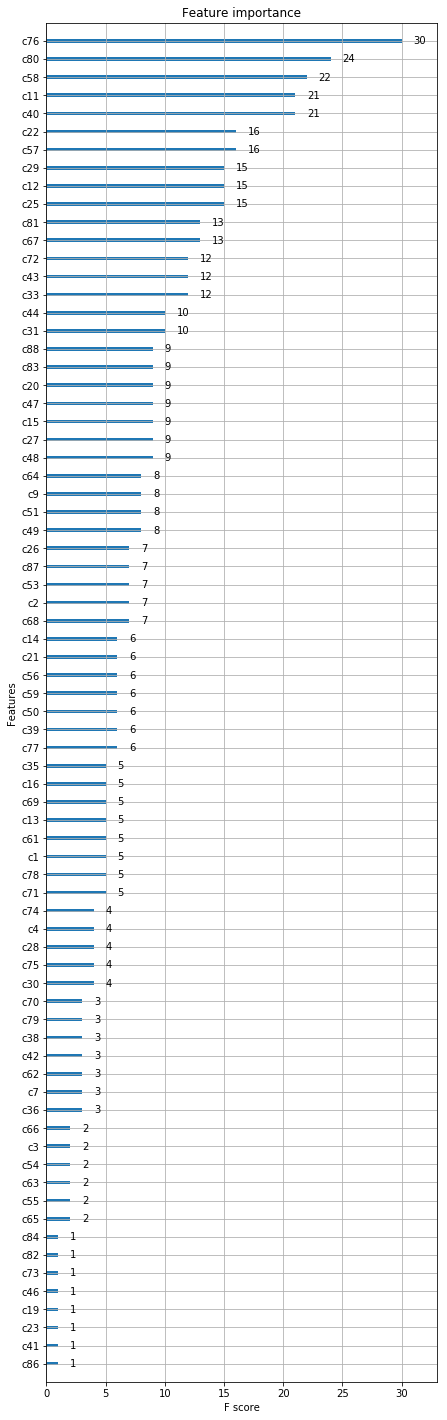

In [41]:
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(7,25))
xgb.plot_importance(model,ax=ax)

# Predict

In [48]:
dfeature = xgb.DMatrix(feature.values, label=y.values, feature_names=feature_name)

train_predict = bst.fit(dfeature)
print(train_predict.shape)
train_predict

AttributeError: 'Booster' object has no attribute 'fit'

In [28]:
test_feature = test[feature_name]
print(test_feature.shape)
test_feature.head()

(361500, 88)


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88
0,-0.336471,0.001629,-0.005328,0.337606,0.0,0.0,0.0,0.0,0.000779,-0.000000,...,0.078639,-0.121671,-0.007804,0.0,-0.261070,0.0,0.0,0.0,-0.002886,-0.999901
1,0.023397,0.010739,-0.035836,-0.017537,0.0,0.0,0.0,0.0,-0.003914,-0.656868,...,0.006190,0.071016,-0.008752,0.0,0.072960,0.0,0.0,0.0,-0.043107,1.056089
2,0.050958,0.012048,-0.004990,0.020966,-0.0,0.0,0.0,0.0,0.016245,-0.000000,...,-0.022399,-0.015489,-0.025594,0.0,0.046554,0.0,0.0,0.0,0.322360,1.506708
3,-0.123669,0.082726,-0.019575,0.000084,0.0,0.0,0.0,0.0,0.006868,-0.000000,...,0.004039,-0.086416,-0.002464,0.0,0.004583,0.0,0.0,0.0,0.022171,0.653286
4,1.596477,0.035155,-0.000731,0.028250,0.0,0.0,0.0,0.0,-0.025400,-0.000000,...,-0.056909,0.006886,-0.001491,0.0,0.082378,0.0,0.0,0.0,0.005997,-0.309680


In [29]:
dtest = xgb.DMatrix(test_feature.values, label=test_y.values, feature_names=feature_name)
test_predict = model.predict(dtest)
print(test_predict.shape)
test_predict

(361500,)


array([ 0.49710658,  0.50010246,  0.50451541, ...,  0.50588548,
        0.50055242,  0.50310427], dtype=float32)

In [30]:
from sklearn.metrics import log_loss

In [31]:
tr_diviation = trainval["target"]-train_predict
#tr_mae = np.absolute(tr_diviation).mean()
tr_logloss = log_loss(trainval["target"], train_predict, eps=1e-15, normalize=True, sample_weight=None, labels=None)
#te_diviation = test["y"]-test_predict
#te_logloss = np.absolute(te_diviation).mean()
te_logloss = log_loss(test["target"], test_predict, eps=1e-15, normalize=True, sample_weight=None, labels=None)
print("trainデータの予想のLogLoss =",tr_logloss)
print("testデータの予想のLogLoss =",te_logloss)

ValueError: y_true contains only one label (1.0). Please provide the true labels explicitly through the labels argument.

In [120]:
tr_predict = pd.DataFrame(train_predict)
tr_predict.loc[:,"target"] = trainval["target"]
tr_predict.columns = ["predict","target"]
print(tr_predict.shape)
tr_predict.head()

(560000, 2)


,predict,target
0,0.535339,1
1,0.397818,0
2,0.507001,0
3,0.514319,0
4,0.503205,0


In [121]:
predict = pd.concat((tr_predict,te_predict),axis=0)
predict = predict.reset_index(drop=True).copy()
print(predict.shape)
predict.head()

NameError: name 'te_predict' is not defined

In [122]:
plot = go.Scatter( x=compose.datetime, y=compose['y'])
train_plot = go.Scatter( x=tr_predict["datetime"], y=tr_predict["predict"])
test_plot = go.Scatter( x=te_predict["datetime"], y=te_predict["predict"])
data =[plot,train_plot,test_plot]
plotly.offline.iplot(data)

NameError: name 'go' is not defined